<a href="https://colab.research.google.com/github/namoshi/chiral/blob/master/new_logit_chiral-pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression for Chiral/Achiral Classification  (New Data)

In [1]:
import numpy as np
import csv
#import matplotlib.pyplot as plt
from sklearn import linear_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [0]:
# Read data from file (2atom-chiral.csv)
with open('2atoms-chiral.csv', 'r') as csvfile:
    dataReader = csv.reader(csvfile, delimiter=',')
    # Skip Header
    next(dataReader)
    chiral_data = []
    count = 0
    for row in dataReader:
        # print("line Num = %02d" % count)
        chiral_data.append([row[7], row[12]])
        count += 1


#X_chiral = np.asarray(chiral_data[1:])
X_chiral = np.asarray(chiral_data)
X_chiral = X_chiral.astype(np.float)

print('len=', len(X_chiral))

y_chiral = np.ones((len(X_chiral)))

print(X_chiral)
print(y_chiral)


# Read data from file (2atom-achiral.csv)
with open('2atoms-achiral.csv', 'r') as csvfile:
    dataReader = csv.reader(csvfile, delimiter=',')
    # Skip Header
    next(dataReader)
    chiral_data = []
    count = 0
    for row in dataReader:
        #    print "line Num = %02d" % count
        chiral_data.append([row[7], row[12]])
        count += 1


#X_achiral = np.asarray(chiral_data[1:])
X_achiral = np.asarray(chiral_data)
X_achiral = X_achiral.astype(np.float)

print('len=', len(X_achiral))

y_achiral = np.zeros((len(X_achiral)))

print(X_achiral)
print(y_achiral)

X = np.concatenate((X_chiral, X_achiral), axis=0)
y = np.concatenate((y_chiral, y_achiral), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)


b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

#print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))


len= 555
[[  2.  15.]
 [ 14.  16.]
 [  8.  16.]
 ..., 
 [  9.  12.]
 [  9.  12.]
 [  3.  16.]]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. 

全サンプルにロジスティック回帰を適用

Logistic Regression for Categorical Data (using all samples)
Recognition Rates =  0.951170156607
Intercept is  -2.97057693554
Coeffs are
-0.383036728224
-0.570135850075
-1.29241940908
-0.874893632044
-0.200874742229
-0.488506230148
0.15238588092
0.348983095009
-0.168268243013
0.0646202916474
-0.403997919016
0.446690519009
0.0192621303339
-0.0352759382692
-0.0871559402235
0.56125366636
-0.284060295835
0.224852409323
0.761292602356
-0.354695885565
-1.67776121244
-1.40712060077
-1.79255110252
-0.41746325652
-0.135282580008
-0.590122016423
-0.462576488363
-0.257015690992
-0.0587707732703
0.369520686361
0.176933613459
0.909489079179
0.786347736987
0.887956256277
0.348069902257
-0.0568272055676


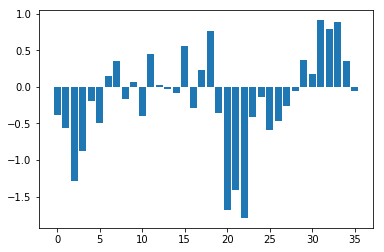

In [0]:
# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (using all samples)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()


サンプル数がアンバランスなので，achiralのサンプルから１０００サンプルをランダムに選択して，ロジスティック回帰を適用

X= [[  2.  15.]
 [ 14.  16.]
 [  8.  16.]
 ..., 
 [  9.   9.]
 [  3.  13.]
 [  9.  14.]]
y= [ 1.  1.  1. ...,  0.  0.  0.]
A= [[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[ 109.  113.  361.   77.  106.   64.   46.  109.   72.   98.   72.   56.
  117.   81.   54.   17.    2.    1.]
B= [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[  64.   31.  118.   27.   25.   14.   16.   25.   37.   69.   21.   57.
  126.  251.  192.  369.  113.]
AB= [[ 0.  1.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Logistic Regression for Categorical Data (1000 achi

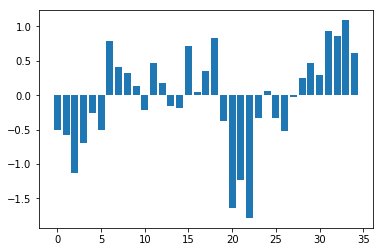

In [0]:
#===========================================================================
#### Reduce the number of achiral samples
# 1000 samples are randomly selected
sind = np.random.permutation(range(len(X_achiral)))
sind = sind[:1000]

X = np.concatenate((X_chiral, X_achiral[sind]), axis=0)
y = np.concatenate((y_chiral, y_achiral[sind]), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)

print(np.sum(a_categorical, axis=0))

b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))

# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (1000 achiral samples are randomly selected)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()


サンプル数がアンバランスなので，achiralのサンプルから２０００サンプルをランダムに選択して，ロジスティック回帰を適用

X= [[  2.  15.]
 [ 14.  16.]
 [  8.  16.]
 ..., 
 [  3.  13.]
 [ 11.   3.]
 [  5.  16.]]
y= [ 1.  1.  1. ...,  0.  0.  0.]
A= [[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
B= [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
AB= [[ 0.  1.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
Logistic Regression for Categorical Data (2000 achiral samples are randomly selected)
Recognition Rates =  0.782778864971
Intercept is  -1.48159766422
Coeffs are
-0.32676497125
-0.438118979998
-1.17868291532
-0.839270288029
-0.0927972319539
-0.626763791789
0.09623514

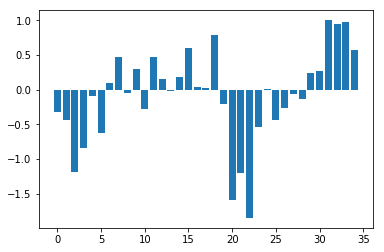

In [0]:
#==============================================================================
# 2000 samples are randomly selected
sind = np.random.permutation(range(len(X_achiral)))
sind = sind[:2000]

X = np.concatenate((X_chiral, X_achiral[sind]), axis=0)
y = np.concatenate((y_chiral, y_achiral[sind]), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)


b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

#print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))

# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (2000 achiral samples are randomly selected)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()
